In [11]:
%matplotlib inline

import string
import random
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(1958, 320, 'Connecticut Traffic Deaths,\n1951 - 1959')

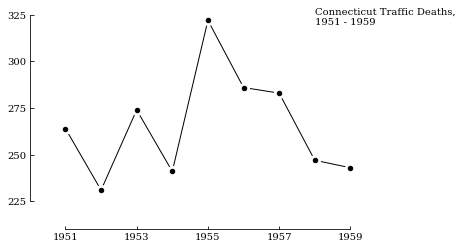

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Global options.
plt.rcParams['font.family'] = 'serif'

# Data from p74 of Visual Display of Quantitative Information.
x = list(range(1951, 1960))
y = [264, 231, 274, 241, 322, 286, 283, 247, 243]

# Plot line, line masks, then dots.
fig, ax = plt.subplots()
ax.plot(x, y, linestyle='-', color='black', linewidth=1, zorder=1)
ax.scatter(x, y, color='white', s=100, zorder=2)
ax.scatter(x, y, color='black', s=20, zorder=3)

# Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set spine extent.
ax.spines['bottom'].set_bounds(min(x), max(x))
ax.spines['left'].set_bounds(225, 325)

# Reduce tick spacing.
x_ticks = list(range(min(x), max(x)+1, 2))
ax.xaxis.set_ticks(x_ticks)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=25))
ax.tick_params(direction='in')

# Adjust lower limits to let data breathe.
ax.set_xlim([1950, ax.get_xlim()[1]])
ax.set_ylim([210, ax.get_ylim()[1]])

# Axis labels as a title annotation.
ax.text(1958, 320, 'Connecticut Traffic Deaths,\n1951 - 1959')

Text(15, 12, "The first dataset in\nAnscombe's quartet")

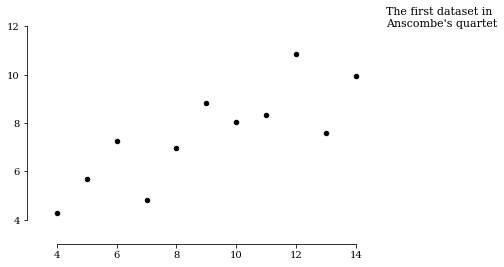

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Gobal options.
plt.rcParams['font.family'] = 'serif'

# Anscombe's quartet #1.
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

# Plot the dots.
fig, ax = plt.subplots()
ax.scatter(x, y, color='black', s=20)

# Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase y tick spacing.
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=2))

# Set spine extent.
ax.spines['bottom'].set_bounds(min(x), max(x))
ax.spines['left'].set_bounds(4, 12)

# More room for data.
ax.set_xlim([3, 14.2])
ax.set_ylim([3, 12])

# Title.
ax.text(15, 12, "The first dataset in\nAnscombe's quartet", size=11)

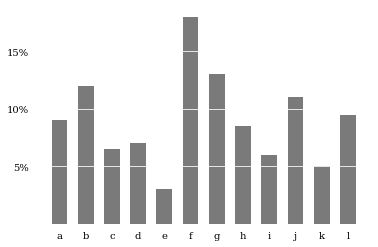

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Gobal options.
plt.rcParams['font.family'] = 'serif'

# Data from p128 of Visual Display of Quantitative Information.
y = [9, 12, 6.5, 7, 3, 18, 13, 8.5, 6, 11, 5, 9.5]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

# Plot the bars.
fig, ax = plt.subplots()
x = list(range(len(y)))
ax.bar(x, y, color='#7a7a7a', width=0.6)

# Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add labels to x axis.
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Add labels to y axis.
y_ticks = [5, 10, 15]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

# Remove tick marks.
ax.tick_params(
    bottom=False,
    left=False, 
)

# Add bar lines as a horizontal grid.
ax.yaxis.grid(color='white')

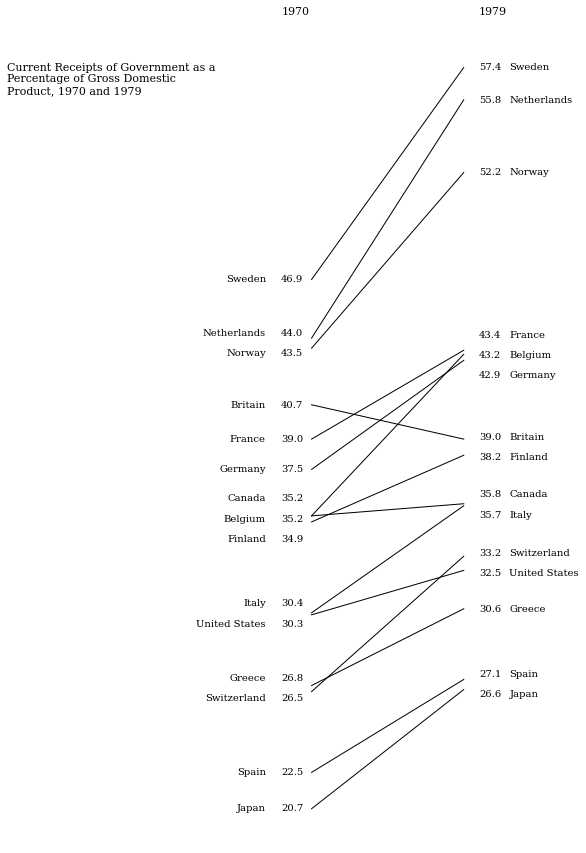

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Gobal options.
plt.rcParams['font.family'] = 'serif'

# Data from p158 of Visual Display of Quantitative Information.
labels = [
    'Sweden', 'Netherlands', 'Norway', 'Britain', 'France', 'Germany',
    'Belgium', 'Canada', 'Finland', 'Italy', 'United States', 'Greece',
    'Switzerland', 'Spain', 'Japan'
]
y_left = [46.9, 44, 43.5, 40.7, 39, 37.5, 35.2, 35.2, 34.9, 30.4,
    30.3, 26.8, 26.5, 22.5, 20.7]
y_right = [57.4, 55.8, 52.2, 39, 43.4, 42.9, 43.2, 35.8, 38.2, 35.7,
    32.5, 30.6, 33.2, 27.1, 26.6]

# Plot the lines..
fig, ax = plt.subplots(figsize=(3, 15))
for left, right in zip(y_left, y_right):
    ax.plot([0, 1], [left, right], color='black', linewidth=1)
    
    
def resolve_overlaps(y, lh):
    '''
    Given a sorted list of y values, adjust them so all adjacent values are
    more than lh distance apart.
    '''
    y = np.asarray(y)
    y_new = y.copy()

    diff = np.abs(y - np.roll(y, -1))
    overlaps_with_next = diff < lh
    if not(any(overlaps_with_next)):
        return y
    
    id_ = 0
    bunch_ids = np.nan * y
    for i in range(1, len(y)):
        if overlaps_with_next[i]:
            bunch_ids[i] = id_
        elif overlaps_with_next[i-1] and not overlaps_with_next[i]:
            bunch_ids[i] = id_
            id_ += 1
    if overlaps_with_next[0]:
        bunch_ids[0] = bunch_ids[1]

    for id_ in np.unique(bunch_ids[np.isfinite(bunch_ids)]):
        bunch = y[bunch_ids == id_]
        bunch_new = bunch.copy()
        n = len(bunch)
        centre = bunch.min() + (bunch.max() - bunch.min()) / 2
        bunch_new = np.linspace(centre - (lh * (n-1)/2), centre + (lh * (n-1)/2), n)
        y_new[bunch_ids == id_] = bunch_new
        
    return y_new


    
    
# Draw left label and value. Need to sort labels first, then adjust for overlaps.
line_height = 1
y_left_sorted, labels_sorted = zip(*sorted(zip(y_left, labels)))
y_left_plot = resolve_overlaps(y_left_sorted, line_height)
for y, y_text, label in zip(y_left_sorted, y_left_plot, labels_sorted):
    ax.text(-0.2, y_text, '{:.1f}'.format(y), va='center')
    ax.text(-0.3, y_text, label, ha='right', va='center')
    
# Same for the right labels.
y_right_sorted, labels_sorted = zip(*sorted(zip(y_right, labels)))
y_right_plot = resolve_overlaps(y_right_sorted, line_height)
for y, y_text, label in zip(y_right_sorted, y_right_plot, labels_sorted):
    ax.text(1.1, y_text, '{:.1f}'.format(y), va='center')
    ax.text(1.3, y_text, label, va='center')

# Remove axis lines.
ax.axis('off')

# Annotations.
title = 'Current Receipts of Government as a'
title += '\nPercentage of Gross Domestic'
title += '\nProduct, 1970 and 1979'
ax.text(-2, 56.1, title, size=11)
ax.text(-0.2, 60, '1970', size=11)
ax.text(1.1, 60, '1979', size=11)
plt.savefig('foo.png',dpi=200,bbox_inches='tight')